In [26]:
#!pip install pyforest 
#pip install --upgrade pyforest
#pip install --upgrade openpyxl
#pip install --upgrade empyrical
#pip install --upgrade calplot
#pip install PyQt5

# https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/


import pandas as pd
import numpy as np


import ffn as ffn
import empyrical as emp
import seaborn as sns
import calplot 


import tkinter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('TkAgg')
# set chart styles

sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})


In [27]:
FILE_NAV = 'rawdata/nav-series.xlsx'
FILE_FLOWS = 'rawdata/net-flows.xlsx'
nav = pd.read_excel(FILE_NAV)
flows = pd.read_excel(FILE_FLOWS, sheet_name=1)


#create index on pricing_date
nav['PRICING_DATE']=pd.to_datetime(nav['PRICING_DATE'])
nav.set_index('PRICING_DATE', inplace=True)
nav.sort_index(inplace=True)
nav

,ISIN_CODE,NAV_ADJUSTED,RISK_FREE_RATE,ISO_ALPHA_3,NAV,BENCH_LEVEL
PRICING_DATE,,,,,,
2008-09-29,LU0340557775,100.00,152.4496,USD,100.00,114.495100
2008-09-30,LU0340557775,100.06,152.4619,USD,100.06,116.346400
2008-10-01,LU0340557775,99.99,152.4760,USD,99.99,116.506200
2008-10-02,LU0340557775,96.67,152.4902,USD,96.67,112.322200
2008-10-03,LU0340557775,94.25,152.5043,USD,94.25,111.816300
...,...,...,...,...,...,...
2022-12-08,LU0340557775,222.09,172.7607,USD,222.09,325.124317
2022-12-09,LU0340557775,223.19,172.7813,USD,223.19,324.669558
2022-12-12,LU0340557775,220.58,172.8433,USD,220.58,326.366931


In [28]:
flows

,Valuation Year,Valuation Month,NET (USD)
0,2008,9,0.000000e+00
1,2008,10,0.000000e+00
2,2008,11,0.000000e+00
3,2008,12,0.000000e+00
4,2009,1,0.000000e+00
...,...,...,...
166,2022,7,-3.281582e+07
167,2022,8,-2.259016e+07
168,2022,9,-4.875771e+07
169,2022,10,-2.435833e+07


In [29]:
df = ffn.core.to_monthly(nav)
df['FLOWS']=flows['NET (USD)'].values
df

,ISIN_CODE,NAV_ADJUSTED,RISK_FREE_RATE,ISO_ALPHA_3,NAV,BENCH_LEVEL,FLOWS
PRICING_DATE,,,,,,,
2008-09-30,LU0340557775,100.06,152.4619,USD,100.06,116.346400,0.000000e+00
2008-10-31,LU0340557775,77.66,152.9013,USD,77.66,93.291900,0.000000e+00
2008-11-28,LU0340557775,66.40,153.3218,USD,66.40,87.163090,0.000000e+00
2008-12-30,LU0340557775,67.37,153.7667,USD,67.37,89.924030,0.000000e+00
2009-01-30,LU0340557775,62.53,154.1039,USD,62.53,82.605470,0.000000e+00
...,...,...,...,...,...,...,...
2022-07-29,LU0340557775,227.90,170.9020,USD,227.90,332.213566,-3.281582e+07
2022-08-31,LU0340557775,220.88,171.2222,USD,220.88,319.983157,-2.259016e+07
2022-09-30,LU0340557775,192.87,171.5990,USD,192.87,289.351393,-4.875771e+07


# Dataset
df is the merged dataset with 3 columns on the portfolio prices (NAV, RISK_FREE_RATE, BENCHMARK LEVEL).
ISIN_CODE and CURRENCY are no longer needed.
FLOWS contains the monthly sum of flows (in or out).

df has been resampled to monthly position to match the flows.

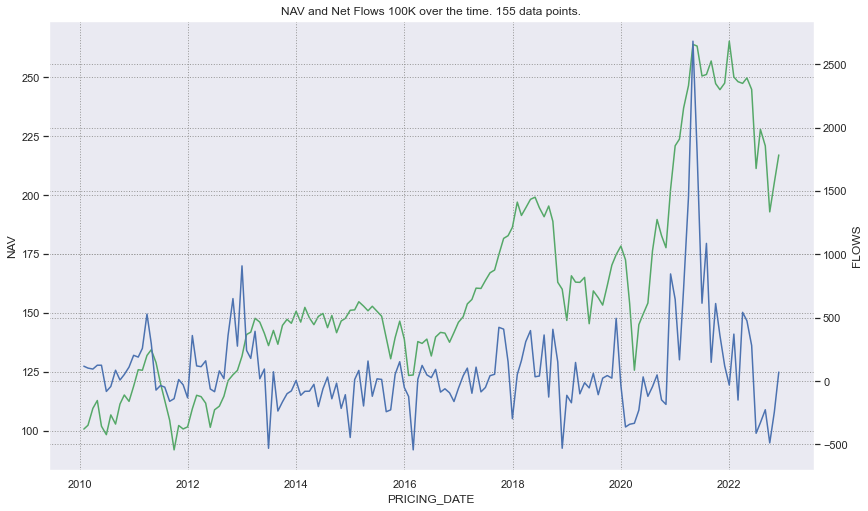

In [30]:
# plot NAV and FLOWS
# drop data before 2010 because FLOWS are flat
df = df['2010':].copy()
try:
    df.drop(['ISIN_CODE','ISO_ALPHA_3'], axis=1, inplace=True)
except Exception as e:
    pass
#save this dataset in a file
FILE = 'data/dataset.csv'
df.to_csv(FILE)

#------------------ PLOT -------------------------------
sns.lineplot(data=df,x=df.index,y='NAV', color='g')
ax2 = plt.twinx()
sns.lineplot(data=df.FLOWS/100000, color="b", ax=ax2)
plt.title(f'NAV and Net Flows 100K over the time. {df.shape[0]} data points.')
plt.show();

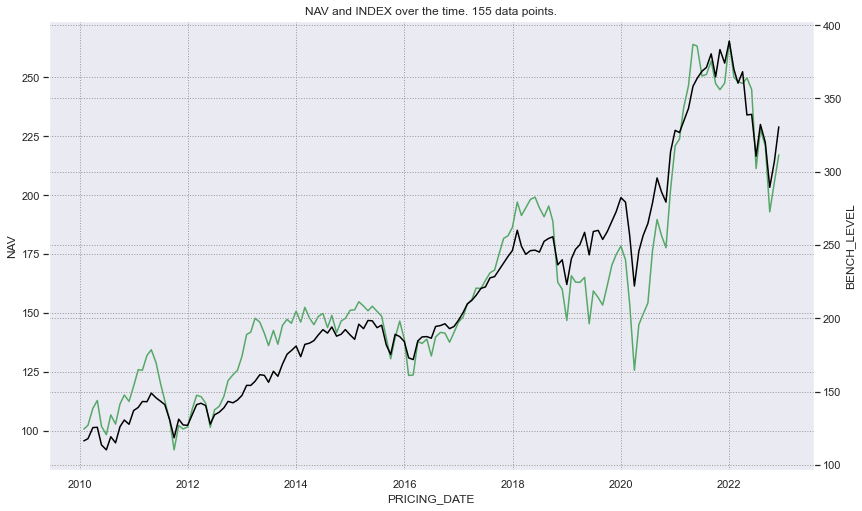

In [31]:
# NAV & BENCHAMRK

#------------------ PLOT -------------------------------
sns.lineplot(data=df,x=df.index,y='NAV', color='g')
ax2 = plt.twinx()
sns.lineplot(data=df.BENCH_LEVEL, color="black", ax=ax2)
plt.title(f'NAV and INDEX over the time. {df.shape[0]} data points.')
plt.show();

## NAV & Flows
NAV and flows might be slowy correlated in the begining of the life of the fund. From 2nd part of 2013 until 2016 it has been a lot of outlfows. In 2017 the NAV grew up a lot but not the flows. It's not the same situation in 2021 the NAV grew up significantly and flows was correlated.

In [32]:

s1=df.NAV
s2=df.FLOWS


s1.corr(s2, method='pearson')

0.4138896108811385

In [33]:
# compute beta and alpha

nav_returns = ffn.core.to_returns(df.NAV) 
ind_returns = ffn.core.to_returns(df.BENCH_LEVEL)
rfr_returns = ffn.core.to_returns(df.RISK_FREE_RATE)

emp.alpha_beta_aligned(nav_returns, ind_returns, rfr_returns, period='monthly')


array([-0.0257785 ,  1.14570697])

In [34]:
def add_statistics_colum(df,col_name,stat, ep):
    s=pd.DataFrame(stat, index=stat.keys()).T[ep]    
    s=pd.DataFrame(s)
    s.columns = [col_name]
    df[col_name]=s[col_name].values
    return df[col_name].values

alpha = {}
beta = {}
avgumonth = {}
for i in df.index.tolist():
    
    end_period = str(i)[:10]
    start=f'{int(str(i)[:4])-1}-{str(i)[:7][-2:]}'
    p=df[start:str(i)[:7]]

    nav_returns = ffn.core.to_returns(df[:str(i)[:7]].NAV) 
    ind_returns = ffn.core.to_returns(df[:str(i)[:7]].BENCH_LEVEL)
    rfr_returns = ffn.core.to_returns(df[:str(i)[:7]].RISK_FREE_RATE)
    a_b = emp.alpha_beta_aligned(nav_returns, ind_returns, rfr_returns, period='monthly')
    alpha[end_period]=a_b[0]
    beta[end_period]=a_b[1]

    ps=ffn.core.PerformanceStats(p['NAV'])
    avgumonth[end_period]=ps.avg_up_month

    #print(f'{str(i)[:7]} nb. periods={p.shape[0]}')



df['ALPHA'] = add_statistics_colum(df,'ALPHA',alpha,end_period)
df['BETA'] = add_statistics_colum(df,'BETA',beta,end_period)
df['AVG_U_M'] = add_statistics_colum(df,'AVG_U_M',avgumonth,end_period)



df.fillna(0)

/Users/darylfelix/miniforge3/envs/.venv/lib/python3.10/site-packages/empyrical/stats.py:1291: RuntimeWarning: Mean of empty slice
  nanmean(alpha_series, axis=0, out=out),
/Users/darylfelix/miniforge3/envs/.venv/lib/python3.10/site-packages/ffn/core.py:258: RuntimeWarning: divide by zero encountered in true_divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))
/Users/darylfelix/miniforge3/envs/.venv/lib/python3.10/site-packages/ffn/core.py:258: RuntimeWarning: divide by zero encountered in true_divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))
/Users/darylfelix/miniforge3/envs/.venv/lib/python3.10/site-packages/ffn/core.py:258: RuntimeWarning: divide by zero encountered in true_divide
  self.calmar = np.divide(self.cagr, np.abs(self.max_drawdown))
/Users/darylfelix/miniforge3/envs/.venv/lib/python3.10/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


,NAV_ADJUSTED,RISK_FREE_RATE,NAV,BENCH_LEVEL,FLOWS,ALPHA,BETA,AVG_U_M
PRICING_DATE,,,,,,,,
2010-01-29,100.66,155.2527,100.66,116.342500,1.176558e+07,0.000000,0.000000,0.000000
2010-02-26,102.28,155.2764,102.28,117.824100,1.027551e+07,0.000000,0.000000,0.000000
2010-03-31,109.45,155.3045,109.45,125.403500,9.501401e+06,0.033761,1.046801,0.000000
2010-04-30,112.79,155.3338,112.79,125.615300,1.253426e+07,0.251582,0.761343,0.038904
2010-05-28,101.88,155.3668,101.88,113.595700,1.252774e+07,0.119703,1.053702,0.038904
...,...,...,...,...,...,...,...,...
2022-07-29,227.90,170.9020,227.90,332.213566,-3.281582e+07,-0.023675,1.150417,0.038824
2022-08-31,220.88,171.2222,220.88,319.983157,-2.259016e+07,-0.022415,1.148158,0.042827
2022-09-30,192.87,171.5990,192.87,289.351393,-4.875771e+07,-0.023954,1.153649,0.042827


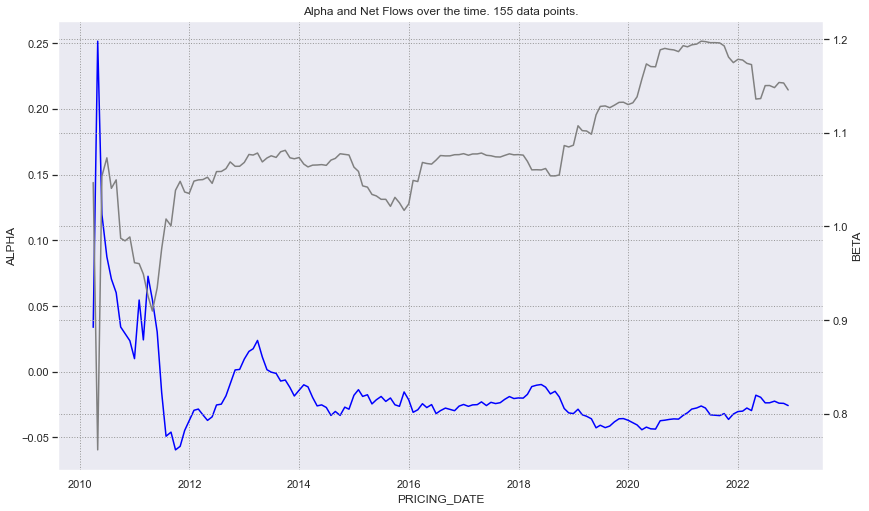

In [35]:
# plot the flows and the Alpha

#------------------ PLOT -------------------------------
sns.lineplot(data=df,x=df.index,y='ALPHA', color='blue')
ax2 = plt.twinx()
sns.lineplot(data=df.BETA, color="grey", ax=ax2)
plt.title(f'Alpha and Net Flows over the time. {df.shape[0]} data points.')
plt.show();

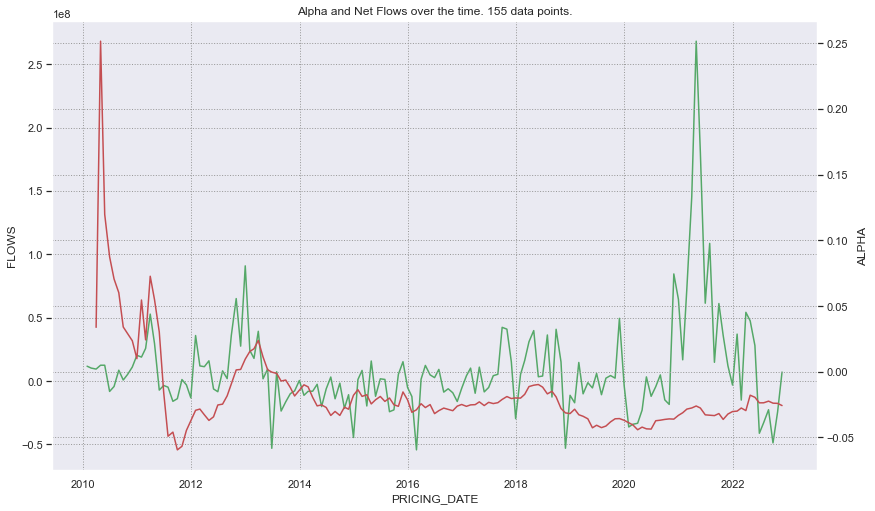

In [36]:
# plot the flows and the Alpha

#------------------ PLOT -------------------------------
sns.lineplot(data=df,x=df.index,y='FLOWS', color='g')
ax2 = plt.twinx()
sns.lineplot(data=df.ALPHA, color="r", ax=ax2)
plt.title(f'Alpha and Net Flows over the time. {df.shape[0]} data points.')
plt.show();

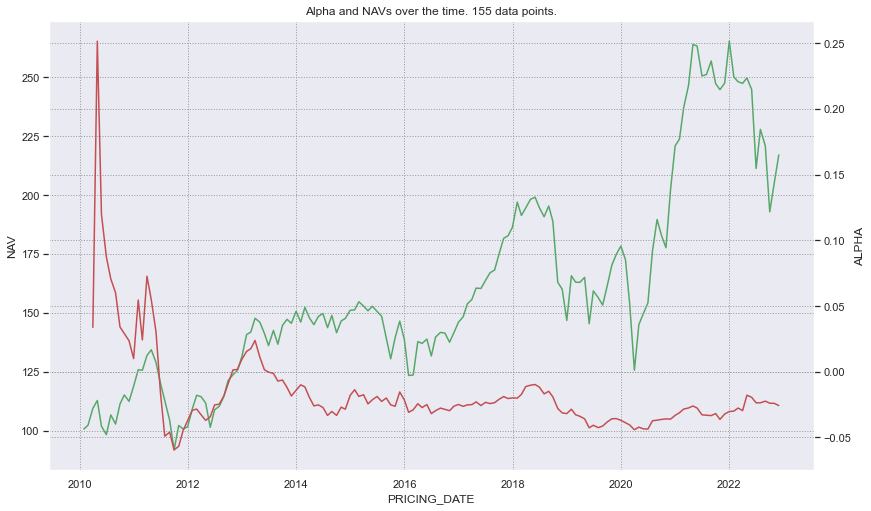

In [37]:
# plot the flows and the Alpha

#------------------ PLOT -------------------------------
sns.lineplot(data=df,x=df.index,y='NAV', color='g')
ax2 = plt.twinx()
sns.lineplot(data=df.ALPHA, color="r", ax=ax2)
plt.title(f'Alpha and NAVs over the time. {df.shape[0]} data points.')
plt.show();

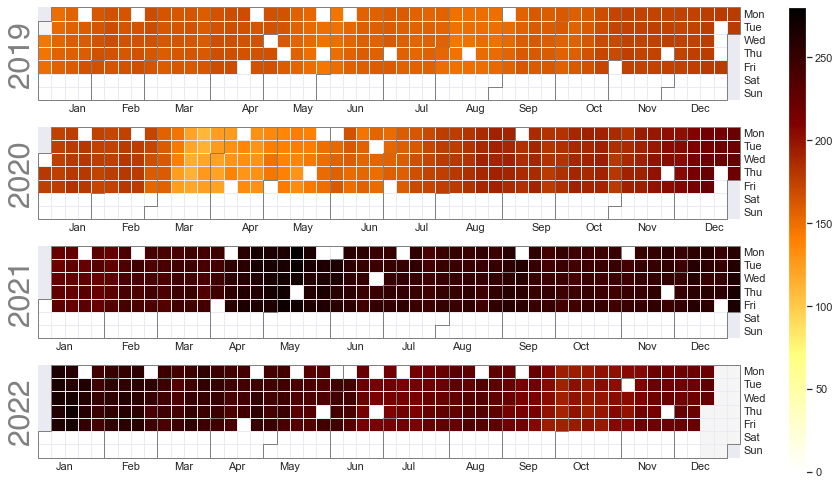

In [38]:
# Plot the NAV daily with calplot to see trends
calplot.calplot(nav.loc['2019':].NAV, cmap='afmhot_r')
plt.show();

## Transform FLOWS columns as a target -1 for out-flows and +1 for inflows

In [39]:
df['TARGET'] = np.where(df['FLOWS']<0,-1,+1)
df.TARGET.value_counts(normalize=True)

 1    0.567742
-1    0.432258
Name: TARGET, dtype: float64

In [44]:
df['A1']=df.ALPHA.shift(1)
df['A2']=df.ALPHA.shift(2)
df['A3']=df.ALPHA.shift(3)
df['B1']=df.BETA.shift(1)
df['B2']=df.BETA.shift(2)
df['B3']=df.BETA.shift(3)

df.dropna()

,NAV_ADJUSTED,RISK_FREE_RATE,NAV,BENCH_LEVEL,FLOWS,ALPHA,BETA,AVG_U_M,TARGET,A1,A2,A3,B1,B2,B3
PRICING_DATE,,,,,,,,,,,,,,,
2010-06-30,98.29,155.4178,98.29,110.203000,-8.140655e+06,0.087439,1.073193,0.038904,-1,0.119703,0.251582,0.033761,1.053702,0.761343,1.046801
2010-07-30,106.68,155.4767,106.68,119.169600,-4.246522e+06,0.070578,1.040602,0.050518,-1,0.087439,0.119703,0.251582,1.073193,1.053702,0.761343
2010-08-31,102.79,155.5387,102.79,115.003700,8.600980e+06,0.060132,1.049686,0.050518,1,0.070578,0.087439,0.119703,1.040602,1.073193,1.053702
2010-09-30,111.30,155.5901,111.30,126.005800,8.548771e+05,0.034027,0.987319,0.056972,1,0.060132,0.070578,0.087439,1.049686,1.040602,1.073193
2010-10-29,115.14,155.6334,115.14,130.559700,5.224494e+06,0.029065,0.984532,0.053227,1,0.034027,0.060132,0.070578,0.987319,1.049686,1.040602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-29,227.90,170.9020,227.90,332.213566,-3.281582e+07,-0.023675,1.150417,0.038824,-1,-0.023710,-0.019480,-0.017893,1.150318,1.136497,1.135967
2022-08-31,220.88,171.2222,220.88,319.983157,-2.259016e+07,-0.022415,1.148158,0.042827,-1,-0.023675,-0.023710,-0.019480,1.150417,1.150318,1.136497
2022-09-30,192.87,171.5990,192.87,289.351393,-4.875771e+07,-0.023954,1.153649,0.042827,-1,-0.022415,-0.023675,-0.023710,1.148158,1.150417,1.150318


In [50]:
cols=['A1','A2','A3','B1','B2','B3','TARGET']
train = df[cols].dropna().copy()
train_set=train.loc['2000':'2021']
test_set=train.loc['2022']

print(train_set.shape, test_set.shape)

(139, 7) (11, 7)
